<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/ML.jpg" alt="Drawing" style="width:1000px;">



# <center> 06. Machine learning: a Regression introduction! </center>

In [ ]:
#@title 1. MONTAR EL DRIVE { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Curso_ML_DL/')
print(os.getcwd())


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/course-IA1/ai-uis-student


In [ ]:
#@title 2. LOAD LIB { display-mode: "form" }
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *

# Regression

   Regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal of regression is to predict the value of the dependent variable based on the values of the independent variables. Here are some key points about regression:


**1.Purpose:** Regression analysis helps in predicting outcomes, understanding relationships between variables, and identifying trends in data.

**2.Types:**

- Linear Regression: Assumes a linear relationship between the dependent and independent variables. It models the relationship through a linear equation.
- Non-linear Regression: Used when the relationship between variables is not linear. This type can fit an infinitely complex model to data.
- Logistic Regression: Used when the dependent variable is categorical. It is commonly used for binary classification tasks.

**3.Components:**

- Dependent Variable (Target): The outcome variable that the model aims to predict.
- Independent Variables (Predictors): These variables are used to predict the value of the dependent variable.
- Coefficients: Values that multiply each input feature. They represent the relationship between each independent variable and the dependent variable.

**4.Applications:**
- Economics (predicting GDP, employment rates, etc.)
- Business (forecasting sales, customer retention rates)
- Medicine (predicting disease outcomes based on patient data)
- Environment (estimating pollution levels)
**5.Methodology:**

- Model Fitting: Applying a statistical method to obtain the best-fit line or curve for the data.
- Assumption Checking: Validating assumptions like linearity, normality, homoscedasticity, and independence.
- Evaluation: Using statistics like R-squared, adjusted R-squared, p-values, and AIC/BIC to assess the fit and predictive power of the model.

**6.Challenges and Considerations:**
- Overfitting and Underfitting: Ensuring the model is generalizable but also adequately fits the data.
- Multicollinearity: Handling when two or more predictors are highly correlated.
- Data Quality: Dealing with issues in data like missing values, outliers, and measurement errors.



dataset description:

- airfoil self-noise: Ruido aerodinámico
- was processed by NASA
- Features: frequency, angle of attack, sound level (press) in decibels

In [ ]:
d = pd.read_csv("data/airfoil_self_noise.dat.gz")
print (d.shape)
d.head()

(1503, 6)


,freq,angle,chord,vel,suc,pres
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


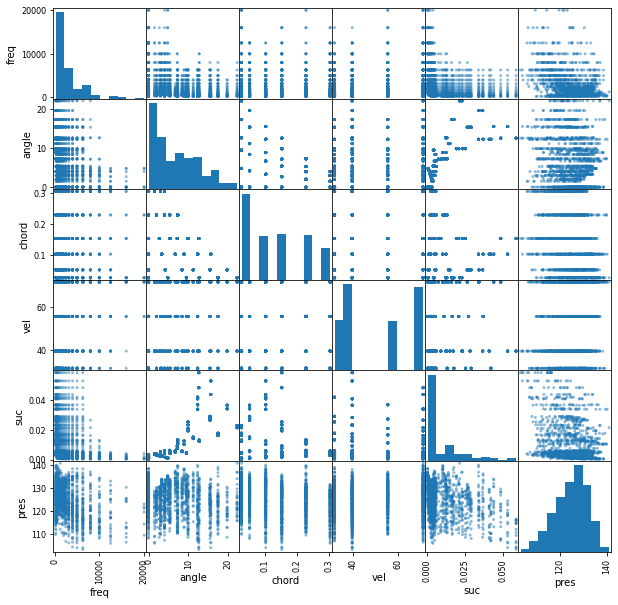

In [ ]:
pd.plotting.scatter_matrix(d, figsize=(10,10));

same workflow, observe performance metric must be different for regression. is result acceptable??

In [ ]:
X = d.values[:,:-1]
y = d.values[:,-1]

#X = d.values[:,[0,1,2,4,5]]
#y = d.values[:,-3]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor()

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
est = DecisionTreeRegressor(max_depth=20)
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print(s)
print ("MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[5.9536387  5.8009441  3.82910041 5.11003861 7.27071287 6.62393161
 5.34484437 6.03468886 5.85282931 7.7714158 ]
MSE 5.959 (+/- 1.05470)


In [ ]:
from sklearn.svm import SVR
est = SVR()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE 39.402 (+/- 5.62163)


let's see SVR result more in detail. observe that whe training with less data performace drops. will use permutations to take a random half.

In [ ]:
n = int(len(d)*0.8)
est = DecisionTreeRegressor()
perm = np.random.permutation(len(d))

Xtr, ytr = X[perm[:n]], y[perm[:n]]
Xts, yts = X[perm[n:]], y[perm[n:]]

est.fit(Xtr, ytr)
print ("MSE %.3f"% mean_squared_error(yts, est.predict(Xts)))

MSE 6.208


Text(0.5, 1.0, 'showing only some random 40 test elements (BLACK line is error)')

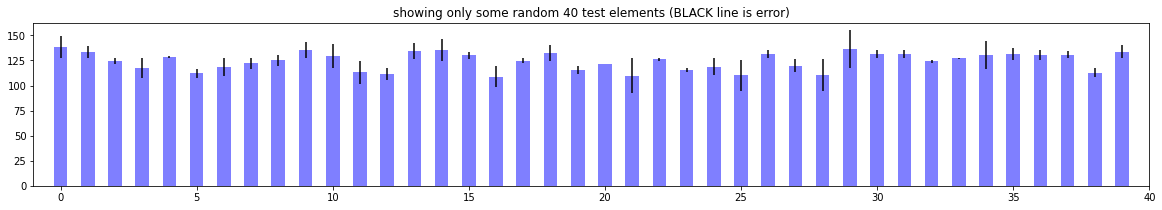

In [ ]:
plt.figure(figsize=(20,3))
preds = est.predict(Xts)
errs  = np.abs(yts - preds)
perm = np.random.permutation(range(len(yts)))[:40]
plt.bar(range(len(perm)), yts[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

finally, let's see the effect of increasing data

In [ ]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

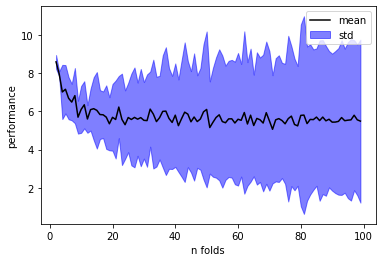

In [ ]:
show_curve(DecisionTreeRegressor())

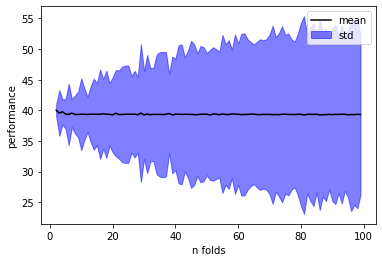

In [ ]:
show_curve(SVR())


In [ ]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

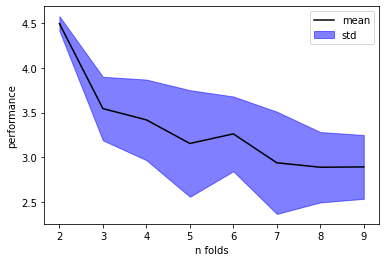

In [ ]:
from sklearn.ensemble import RandomForestRegressor
show_curve(RandomForestRegressor())

#Simple Linear Regression

- This model uses only one predictor, 'Frequency', to estimate the 'Scaled sound pressure level'. The summary will provide coefficients, standard errors, R-squared value, and other statistics that indicate the fit of the model.

In [1]:
# Simple Linear Regression: 'Frequency' as the predictor
X_simple = sm.add_constant(d['Frequency'])  # Add a constant for the intercept
y = d['Scaled sound pressure level']

model_simple = sm.OLS(y, X_simple).fit()
print(model_simple.summary())

# Plotting the results
plt.scatter(d['Frequency'], y, color='blue', label='Data Points')
plt.plot(d['Frequency'], model_simple.predict(X_simple), color='red', label='Regression Line')
plt.xlabel('Frequency')
plt.ylabel('Scaled Sound Pressure Level')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


NameError: name 'sm' is not defined

##Multiple Linear Regression

- This model uses all the available features to predict the 'Scaled sound pressure level'. The additional variables should provide a more accurate and reliable model if they are significant predictors.

In [ ]:
# Multiple Linear Regression: using all other variables as predictors
X_multi = sm.add_constant(d[['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side displacement thickness']])
model_multi = sm.OLS(y, X_multi).fit()
print(model_multi.summary())


# References

[1] airfoil self-noise: https://www.neuraldesigner.com/learning/examples/airfoil_self_noise_prediction

[2] Metrics in regression: https://www.kaggle.com/learn-forum/52081



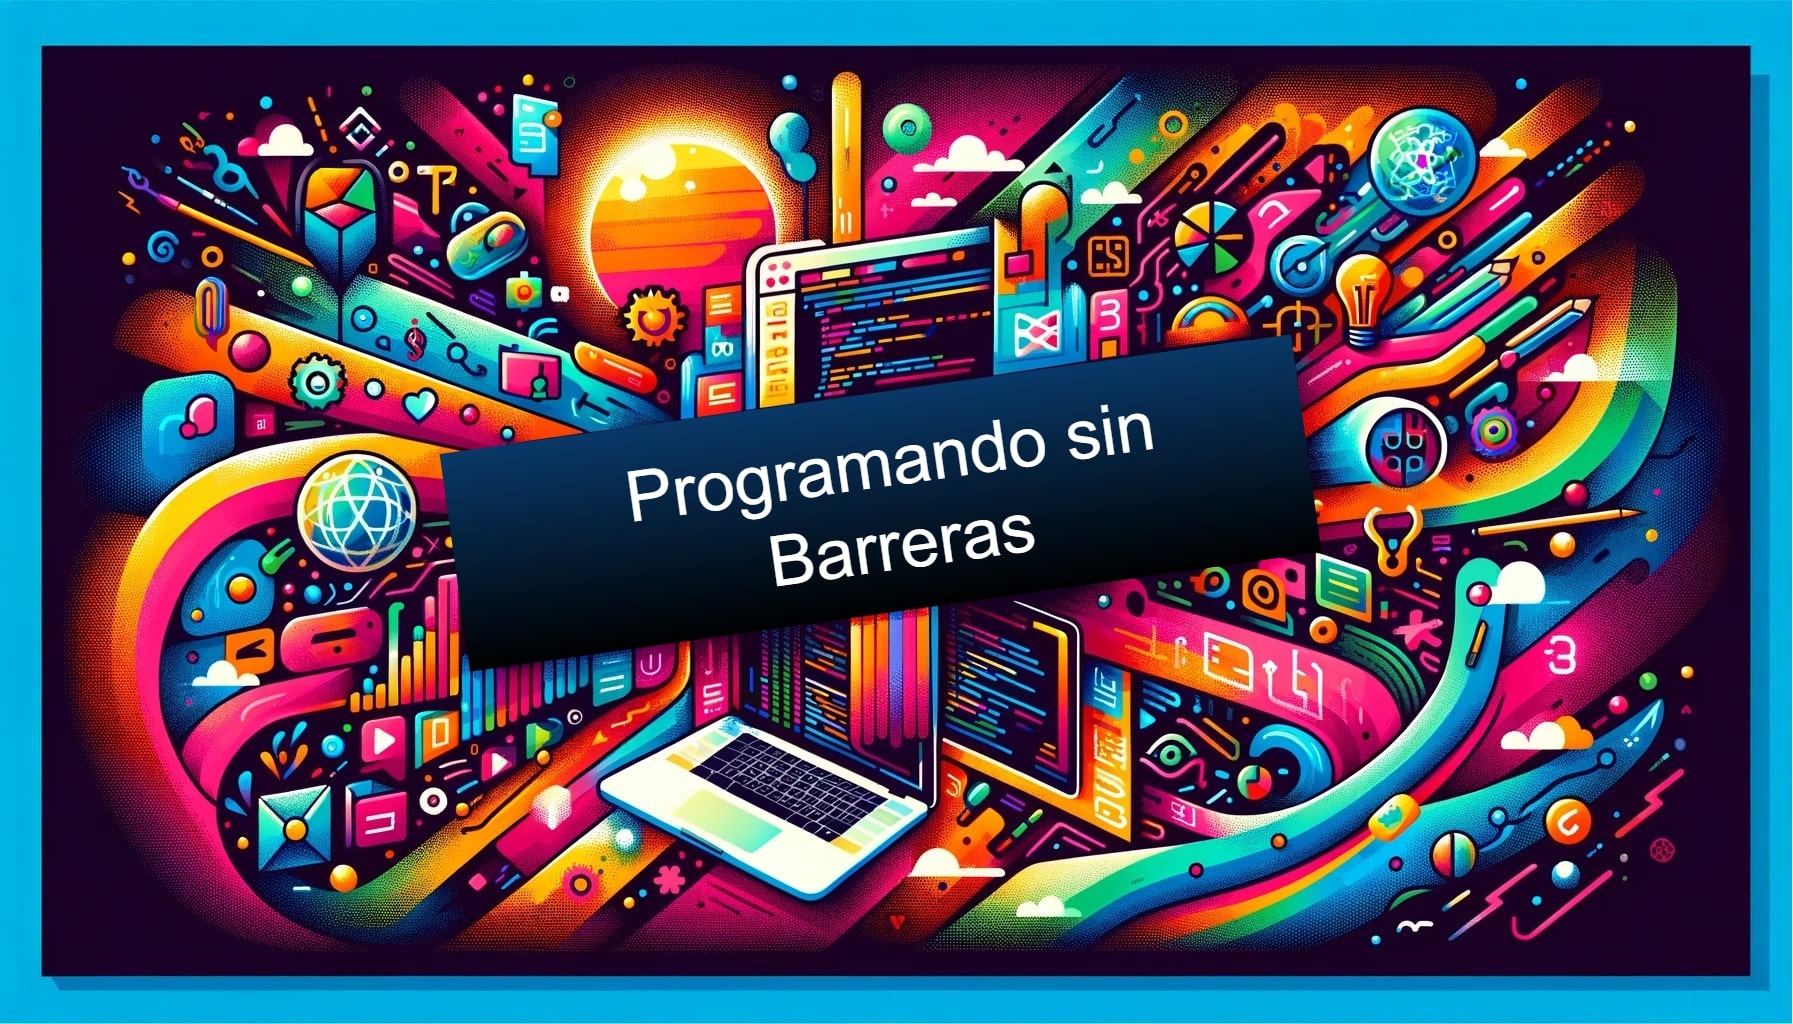